In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('G:\#UTD - MSCS\CS6375 - Machine Learning\Project\spambase\spambase.data', header=None, delimiter=',')

In [3]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
dataset.columns = ['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet', 'order', 'mail', 'receive',
           'will', 'people', 'report', 'addresses', 'free', 'business', 'email', 'you', 'credit', 'your',
           'font', '000', 'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857', 'data', '415',
           '85', 'technology', '1999', 'parts', 'pm', 'direct', 'cs', 'meeting', 'original', 'project', 're',
           'edu', 'table', 'conference', ';', '(', '[', '!', '$', '#', 'avg_length', 'max_length', 'tot_length', 'spam']

In [5]:
dataset.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,;,(,[,!,$,#,avg_length,max_length,tot_length,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [6]:
dataset.isnull().values.any()

False

There are no null values in the dataset

In [7]:
dataset = dataset.drop(['tot_length'], axis=1)

Since total length of sequences of capital letters (tot_length in dataset) is dependent on the length of the email, we will drop this column as we do not have access to the value of the total length of the email

In [8]:
dataset.shape

(4601, 57)

In [9]:
y = dataset.spam

In [10]:
dataset = dataset.drop(['spam'], axis=1)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [12]:
%%capture captured
fig, ax=plt.subplots()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.25, stratify=y, random_state=43)

In [14]:
def plot_train_valid_scores(clf, axes=None, cv=None):
    if cv == None:
        cv = 5
    train_sizes = np.linspace(.1, 1.0, 5)
    train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, train_sizes=train_sizes, cv=cv)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    if axes == None:
        axes = plt
    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

In [15]:
def fitAndPredict(X_train, y_train, x_test, y_test, clf):
    res = []
    size = X_train.shape[0]
    # fit the model using training data
    clf.fit(X_train, y_train)
    # training score 
    res.append(clf.score(X_train, y_train))
    # test score
    res.append(clf.score(X_test, y_test))
    # confusion matrix
    res.append(confusion_matrix(clf.predict(X_test), y_test))
    # plot the ROC curve and compute AUC of ROC value
    return res

In [16]:
def printResults(res):
    print("Model score on training set {0}".format(res[0]))
    print("Model score on test set {0}".format(res[1]))
    print("Confusion Matrix:")
    print("{0}".format(res[2]))

In [17]:
def plot_roc(y_true, y_score, label=None):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    auc_roc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    ax.plot(fpr, tpr, lw=lw, label='ROC curve (area = %0.2f) {0}'.format(label) % auc_roc)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic curve')
    ax.legend(loc="lower right")
    ax.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')

In [18]:
def plot_precision_recall_curve(y_true, y_score, label=None):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_score)
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.title("Precision Recall Curve for {0}".format(label))
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    return (precisions, recalls, thresholds)

In [19]:
def plot_precision_vs_recall(precisions, recalls, label):
    plt.plot(recalls, precisions)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Recall vs Precision {0}".format(label))

In [20]:
from sklearn.linear_model import LogisticRegression

In [25]:
log_reg = LogisticRegression(random_state=43, class_weight='balanced', solver='liblinear')
res = fitAndPredict(X_train, y_train, X_test, y_test, log_reg)
printResults(res)

Model score on training set 0.932463768115942
Model score on test set 0.9261511728931364
Confusion Matrix:
[[650  38]
 [ 47 416]]


In [26]:
y_score = log_reg.decision_function(X_test)

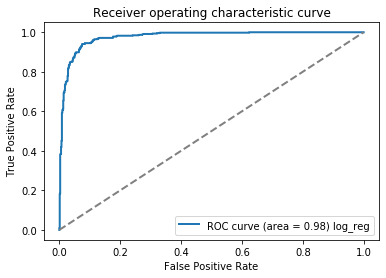

<Figure size 432x288 with 0 Axes>

In [27]:
plot_roc(y_test, y_score, 'log_reg')
fig

In [28]:
# plot_train_valid_scores(LogisticRegression(random_state=43, class_weight='balanced', solver='liblinear'))

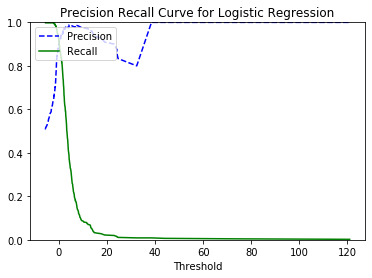

In [29]:
precisions, recalls, thresholds = plot_precision_recall_curve(y_test, y_score, "Logistic Regression")

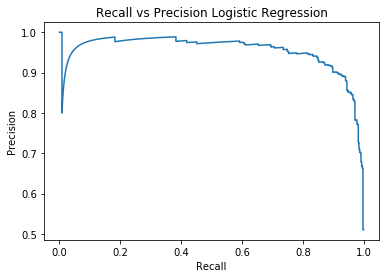

In [30]:
plot_precision_vs_recall(precisions, recalls, "Logistic Regression")

In [31]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [32]:
gnb = GaussianNB()
res = fitAndPredict(X_train, y_train, X_test, y_test, gnb)
printResults(res)

Model score on training set 0.82
Model score on test set 0.8227628149435273
Confusion Matrix:
[[506  13]
 [191 441]]


In [33]:
mnb = MultinomialNB()
res = fitAndPredict(X_train, y_train, X_test, y_test, mnb)
printResults(res)

Model score on training set 0.8295652173913044
Model score on test set 0.8479582971329279
Confusion Matrix:
[[598  76]
 [ 99 378]]


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [35]:
def fitAndPredictTrees(tree_type='decision_tree', verbose=False):
    """ fit and predict on tree algorithms. 
        tree_type can be one of {'decision_tree', 'random_forest'} defaults to 'decision_tree'.
        raises ValueError on invalid value to tree_type parameter """
    best_depth = None
    best_clf = None
    best_res = [float("-inf"), float("-inf"), []]
    for i in range(1, 11):
        clf = None
        if tree_type == 'decision_tree':
            clf = DecisionTreeClassifier(max_depth=i, random_state=43)
        elif tree_type == 'random_forest':
            clf = RandomForestClassifier(max_depth=i, n_estimators=10, random_state=43)
        else:
            raise ValueError('Invalid tree_type')
        res = fitAndPredict(X_train, y_train, X_test, y_test, clf)
        if verbose: 
            print("Results at depth {0} using {1} model".format(i, tree_type))
            printResults(res)
        if res[1] > best_res[1]:
            best_res = res[:]
            best_depth = i
            best_clf = clf
    print("Best depth {0}".format(best_depth))
    printResults(best_res)
    return (best_depth, best_clf)

In [36]:
best_depth, dt_clf = fitAndPredictTrees('decision_tree', verbose=False)

Best depth 7
Model score on training set 0.9388405797101449
Model score on test set 0.9218071242397915
Confusion Matrix:
[[668  61]
 [ 29 393]]


In [37]:
# plot_train_valid_scores(DecisionTreeClassifier(max_depth=best_depth, random_state=43))

In [38]:
y_score = dt_clf.predict_proba(X_test)[:, 1]

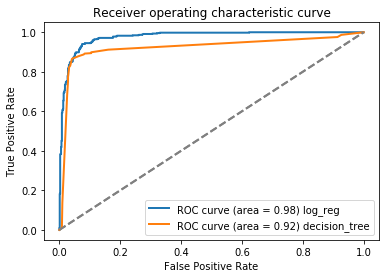

<Figure size 432x288 with 0 Axes>

In [39]:
plot_roc(y_test, y_score, "decision_tree")
fig

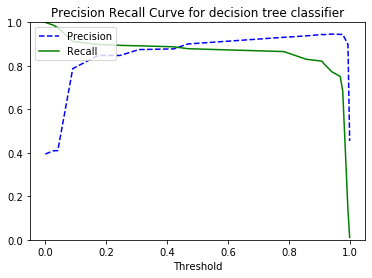

In [40]:
precisions, recalls, thresholds = plot_precision_recall_curve(y_test, y_score, "decision tree classifier")

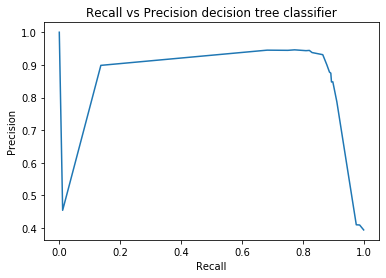

In [41]:
plot_precision_vs_recall(precisions, recalls, "decision tree classifier")

In [42]:
best_depth, rf_clf = fitAndPredictTrees('random_forest')

Best depth 7
Model score on training set 0.948695652173913
Model score on test set 0.9426585577758471
Confusion Matrix:
[[677  46]
 [ 20 408]]


In [43]:
y_score = rf_clf.predict_proba(X_test)[:, 1]

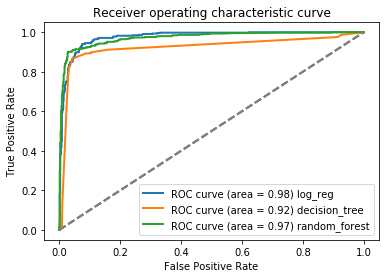

<Figure size 432x288 with 0 Axes>

In [44]:
plot_roc(y_test, y_score, label="random_forest")
fig

In [45]:
# plot_train_valid_scores(RandomForestClassifier(max_depth=best_depth, random_state=43, n_estimators=10))

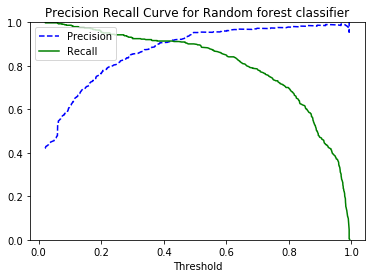

In [46]:
precisions, recalls, thresholds = plot_precision_recall_curve(y_test, y_score, "Random forest classifier")

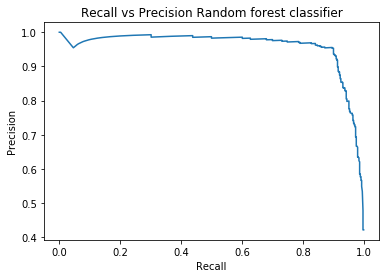

In [47]:
plot_precision_vs_recall(precisions, recalls, "Random forest classifier")

In [48]:
from sklearn.neural_network import MLPClassifier

In [49]:
nnc = MLPClassifier(hidden_layer_sizes=[50, 25, 10, 5], activation='relu', random_state=43, max_iter=100, early_stopping=True)

In [50]:
# plot_train_valid_scores(nnc)

In [51]:
res = fitAndPredict(X_train, y_train, X_test, y_test, nnc)
printResults(res)

Model score on training set 0.9365217391304348
Model score on test set 0.945264986967854
Confusion Matrix:
[[668  34]
 [ 29 420]]


In [52]:
y_score = nnc.predict_proba(X_test)[:, 1]

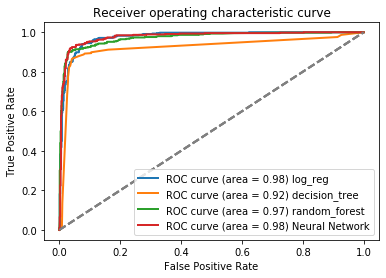

<Figure size 432x288 with 0 Axes>

In [53]:
plot_roc(y_test, y_score, "Neural Network")
fig

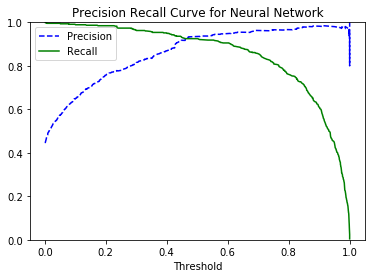

In [54]:
precisions, recalls, thresholds = plot_precision_recall_curve(y_test, y_score, "Neural Network")

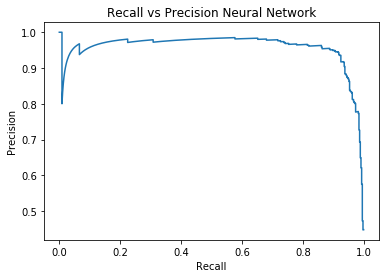

In [55]:
plot_precision_vs_recall(precisions, recalls, "Neural Network")

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
gbc = GradientBoostingClassifier()

In [58]:
res = fitAndPredict(X_train, y_train, X_test, y_test, gbc)
printResults(res)

Model score on training set 0.9634782608695652
Model score on test set 0.947002606429192
Confusion Matrix:
[[671  35]
 [ 26 419]]


In [59]:
y_score = gbc.predict_proba(X_test)[:, 1]

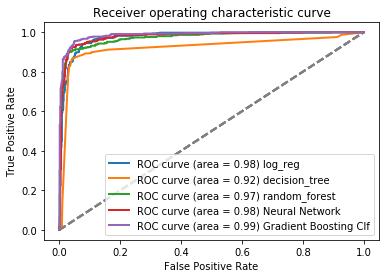

<Figure size 432x288 with 0 Axes>

In [60]:
plot_roc(y_test, y_score, "Gradient Boosting Clf")
fig

In [61]:
# plot_train_valid_scores(GradientBoostingClassifier())

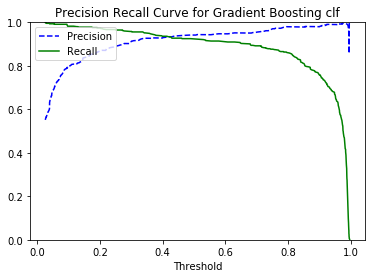

In [62]:
precisions, recalls, thresholds = plot_precision_recall_curve(y_test, y_score, "Gradient Boosting clf")

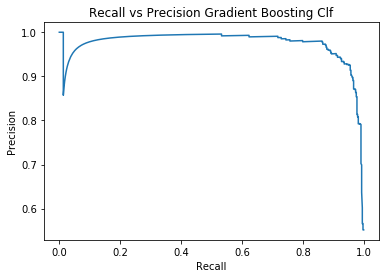

In [63]:
plot_precision_vs_recall(precisions, recalls, "Gradient Boosting Clf")

In [64]:
def learning_curve_grid(clf, title, axes=None, ylim=None, cv=None):
    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")
    plot_train_valid_scores(clf, axes, cv)

In [70]:
%%capture
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

In [71]:
title="Logistic Regression"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=43)
estimator = LogisticRegression(random_state=43, class_weight='balanced', solver='liblinear')
learning_curve_grid(estimator, title, axes=axes[0, 0], ylim=(0.7, 1.01), cv=cv)

title="Gaussian Navie Bayes"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=43)
estimator = GaussianNB()
learning_curve_grid(estimator, title, axes=axes[0, 1], ylim=(0.7, 1.01), cv=cv)

title="Decision Tree Classifier"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=43)
estimator = DecisionTreeClassifier(max_depth=best_depth, random_state=43)
learning_curve_grid(estimator, title, axes=axes[1, 0], ylim=(0.7, 1.01), cv=cv)

title="Random Forest Classifier"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=43)
estimator = RandomForestClassifier(max_depth=best_depth, random_state=43)
learning_curve_grid(estimator, title, axes=axes[1, 1], ylim=(0.7, 1.01), cv=cv)

title="Neural Network"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=43)
estimator = MLPClassifier(hidden_layer_sizes=[50, 25, 10, 5], activation='relu', random_state=43, max_iter=100, early_stopping=True)
learning_curve_grid(estimator, title, axes=axes[2, 0], ylim=(0.65, 1.01), cv=cv)

title="Gradient Descent Classifier"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=43)
estimator = GradientBoostingClassifier()
learning_curve_grid(estimator, title, axes=axes[2, 1], ylim=(0.7, 1.01), cv=cv)

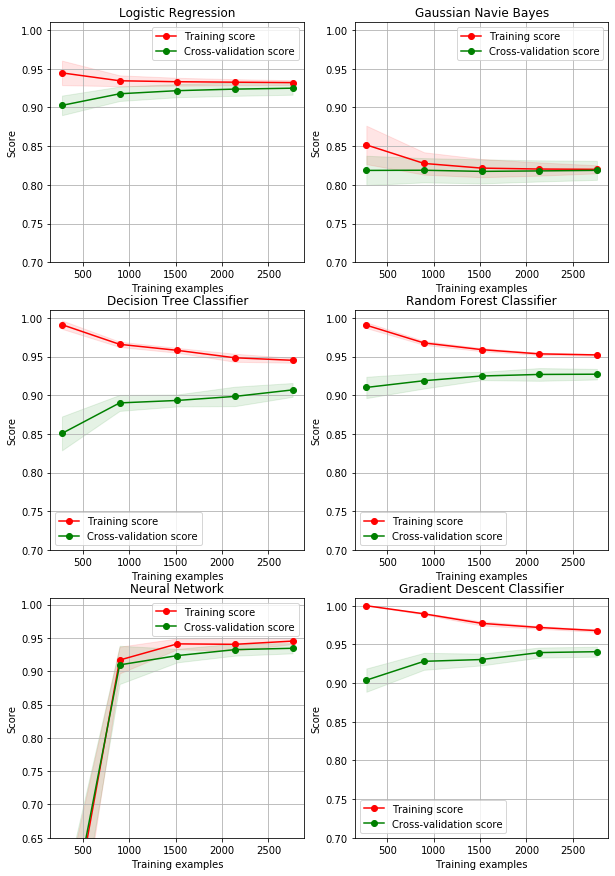

In [72]:
fig